In [1]:
%run 'lib.ipynb'

## $\bar{P}$ Background 

In [2]:
mc = R.TChain( "StMiniMcTree" )
path = "/Users/danielbrandenburg/bnl/local/data/BES/15GeV/urqmd/07_09_15/*.root"
mc.Add( path )

503

In [3]:
can = Canvas( width=1200, height=600)
R.gStyle.SetOptStat( 0 )

dedx = "StMiniMcEvent.mMatchedPairs.mDedxPts > 10" 
fit = "StMiniMcEvent.mMatchedPairs.mFitPts > 15" 
fitr = "StMiniMcEvent.mMatchedPairs.mFitPts / StMiniMcEvent.mMatchedPairs.mAllPts > 0.52"
ptr = "StMiniMcEvent.mMatchedPairs.mPtGl/StMiniMcEvent.mMatchedPairs.mPtPr < 10.0 / 7.0 && StMiniMcEvent.mMatchedPairs.mPtGl/StMiniMcEvent.mMatchedPairs.mPtPr > 7.0 / 10.0"; 
rm = "StMiniMcEvent.mNUncorrectedPrimaries > 5"; # selects 0%-80% centrality
vR = "sqrt( StMiniMcEvent.mVertexX*StMiniMcEvent.mVertexX + (StMiniMcEvent.mVertexY + 0.89)*(StMiniMcEvent.mVertexY + 0.89) ) < 1.0"
dca = "StMiniMcEvent.mMatchedPairs.mDcaGl < 1.0 "

pid = "StMiniMcEvent.mMatchedPairs.mGeantId == 15"
pt = "StMiniMcEvent.mMatchedPairs.mPtPr > 0.5 && StMiniMcEvent.mMatchedPairs.mPtPr < 0.6"

allCuts = pid + " && " + dedx + " && " + fit + " && " + fitr  + " && " + ptr + " && " + rm + " && " + vR + " && " + dca


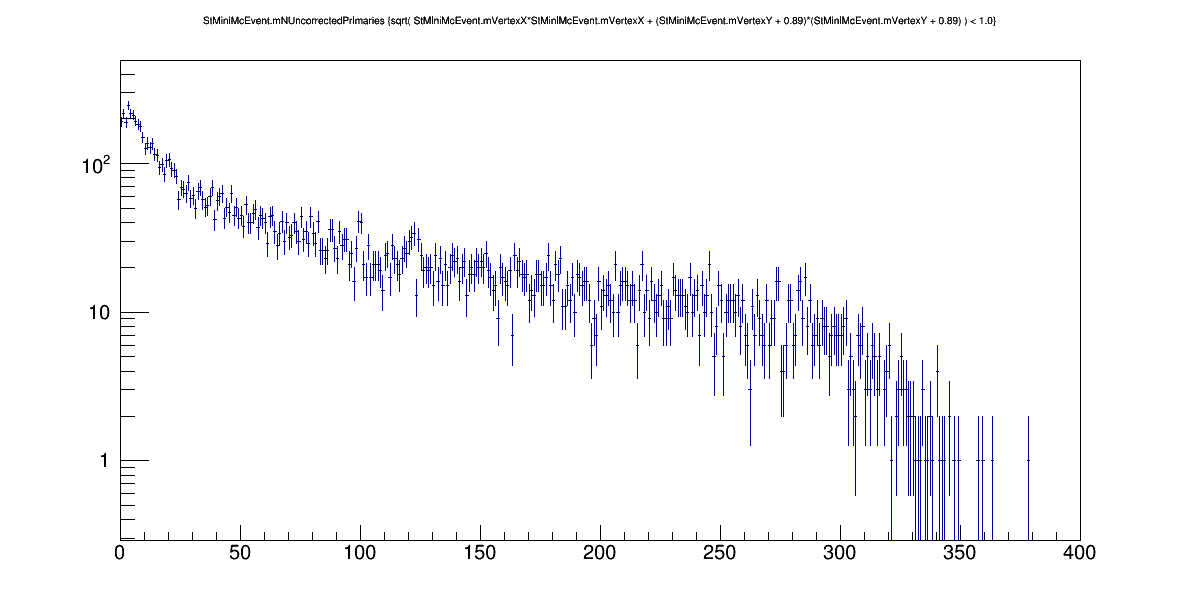

In [4]:
mc.Draw( "StMiniMcEvent.mNUncorrectedPrimaries>>hRefMult( 400, 0, 400 )", vR )
R.gPad.SetLogy(1)
can

In [5]:

mc.Draw( "StMiniMcEvent.mMatchedPairs.mParentGeantId>>hParent(35, -0.5, 34.5)", allCuts + " && " + pt )


614L

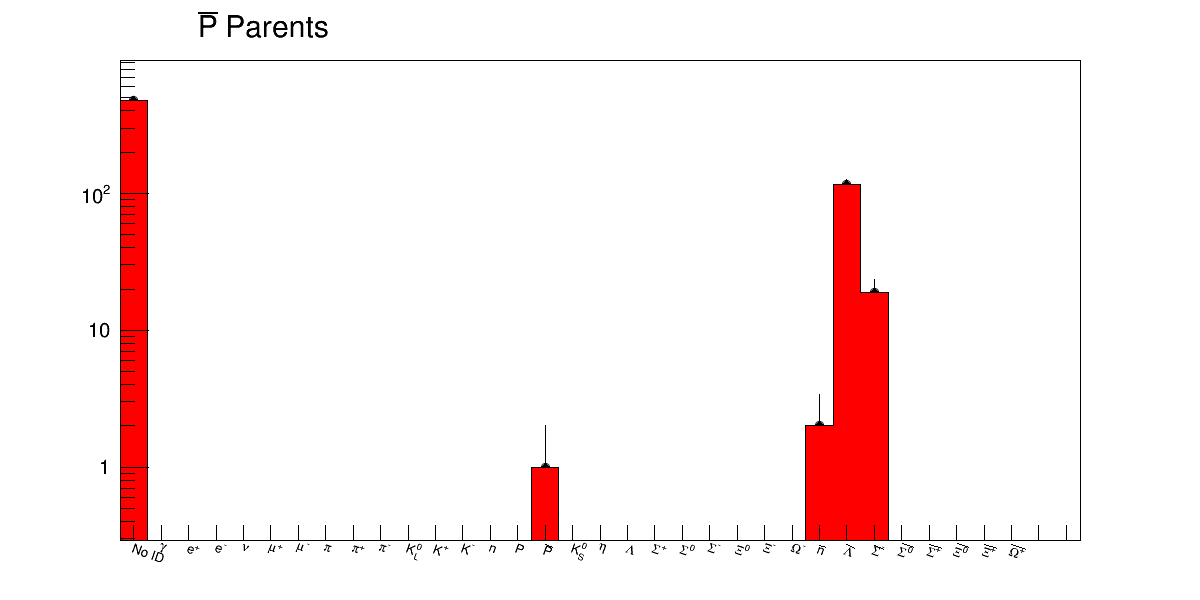

In [6]:
h = R.hParent.Clone( "parents" )
labelsForGEANT( h )
h.Draw( "h")
h.SetTitle( "#bar{P} Parents")
h.SetFillColor( R.kRed )
h.SetFillStyle( 1001 )
R.gPad.SetLogy(1)
can

In [4]:
mc.Draw( "StMiniMcEvent.mMatchedPairs.mPtPr>>hBack(20, 0.0, 2.1)", "StMiniMcEvent.mMatchedPairs.mParentGeantId==26 &&  " + allCuts )

mc.Draw( "StMiniMcEvent.mMatchedPairs.mPtPr>>hSig(20, 0.0, 2.1)", "StMiniMcEvent.mMatchedPairs.mParentGeantId==0 && " + allCuts )


4544L

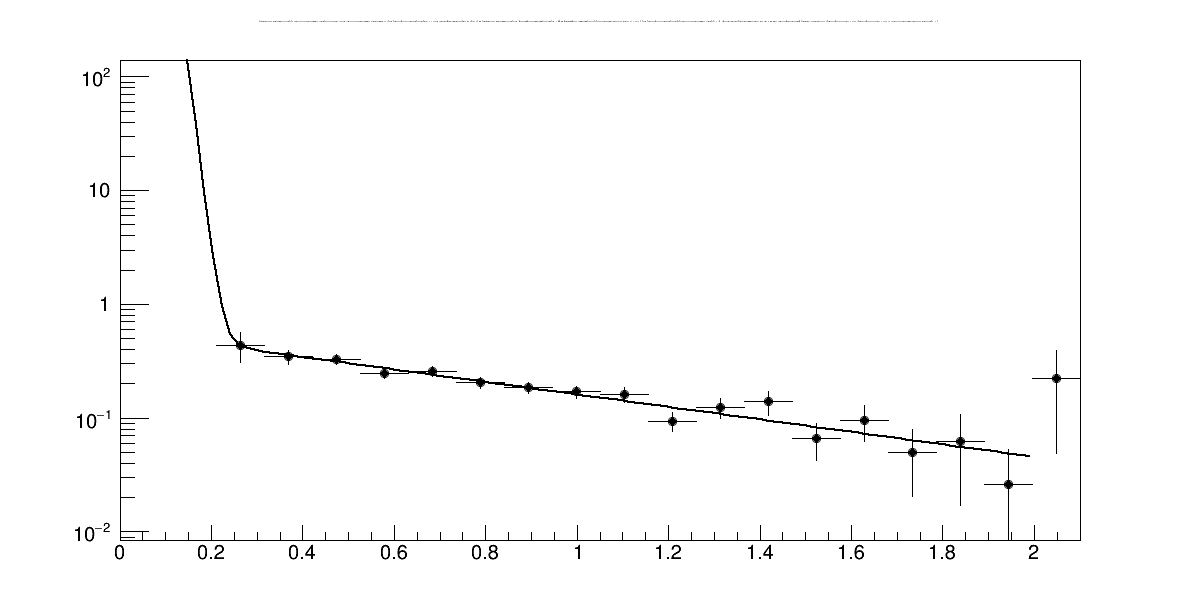

In [5]:
hFrac = R.hBack.Clone( "hFrac" )
hFrac.Divide( R.hSig )
hFrac.Draw()

fn = R.TF1( "fn", "(1-[0]*exp( -[1] * x ) ) * [2] * exp( -[3] * x )", 0.1, 2 )
fn.SetParameters( .5, 5, .5, 2 )
hFrac.Fit( fn, "R" )
fn.SetLineWidth( 2 )
fn.Draw("same")

R.gPad.SetLogy(1)
can

In [9]:
hstr = ">>hEnergyLoss(100, 0.1, 2.1, 100, -0.1, 0.1)"
mc.Draw( "StMiniMcEvent.mMatchedPairs.mPtPr - StMiniMcEvent.mMatchedPairs.mPtMc : StMiniMcEvent.mMatchedPairs.mPtPr" + hstr, "StMiniMcEvent.mMatchedPairs.mParentGeantId==0 && " + allCuts)

4544L

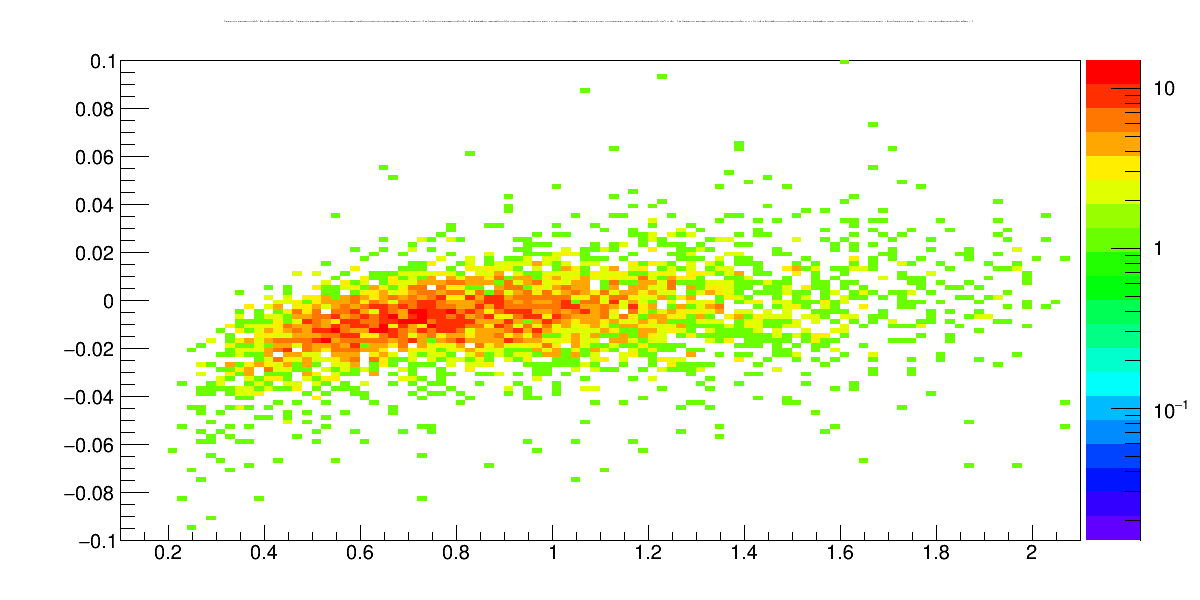

In [10]:
R.hEnergyLoss.Draw("colz")
R.gPad.SetLogy(0)
R.gPad.SetLogz(1)
can

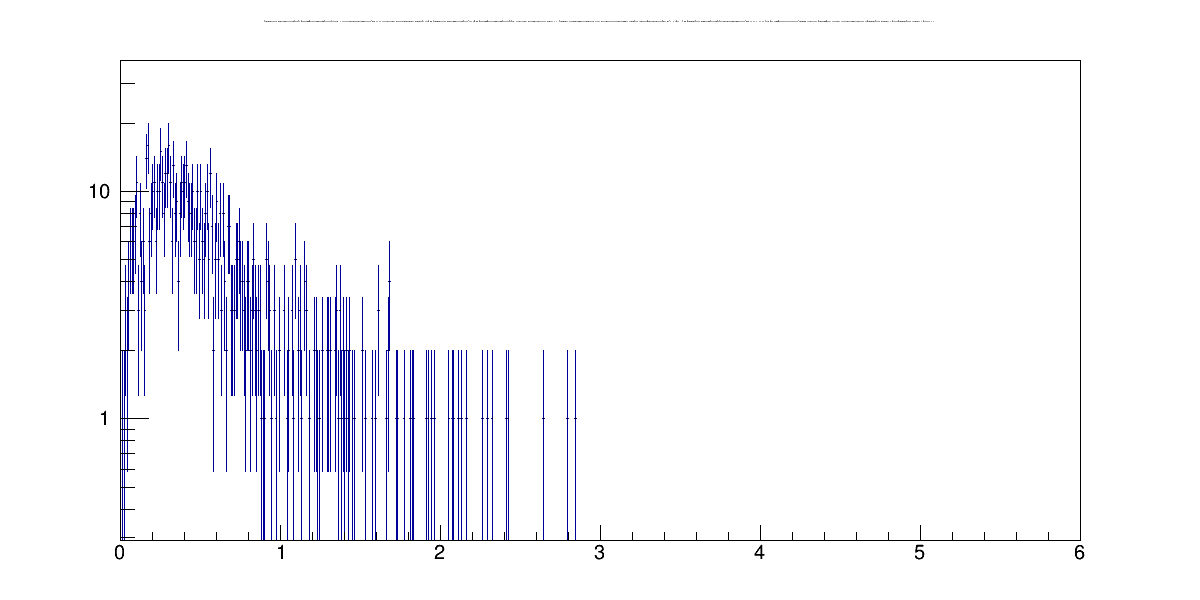

In [11]:

mc.Draw( "StMiniMcEvent.mMatchedPairs.mDcaGl>>hDca(600, 0, 6.0)", pid + " && " + pt + " && " + dedx + " && " + fit + " && " + fitr  + " && " + ptr + " && " + rm + " && " + vR )
R.gPad.SetLogy(1)
can